# Decision Trees and Random Forests

## Dataset: https://www.kaggle.com/uciml/indian-liver-patient-records/downloads/indian-liver-patient-records.zip/1

In [63]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [64]:
data = pd.read_csv('liverpatients.csv')

In [65]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [66]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [67]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [68]:
## We have some missing data in the 'Albumin_and_Globulin_Ratio' column, lets fill the values with the mean

In [69]:
data = data.fillna(data.mean())

In [70]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Visualizing the data

##### This phase would also normally include the analysis phase where we would analyse and explain the data findings, but in this case the purpose of the data is not very important. In this notebook, the goal is to improve our visualization skills and simply build the model needed.

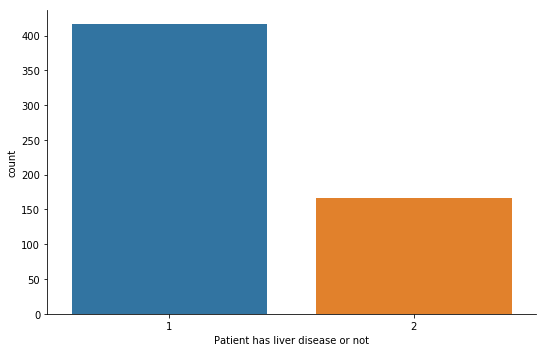

In [71]:
fg = sns.catplot('Dataset', data=data, kind='count', aspect=1.5)
fg.set_xlabels('Patient has liver disease or not')

In [72]:
data.groupby('Gender')['Gender'].count()


Gender
Female    142
Male      441
Name: Gender, dtype: int64

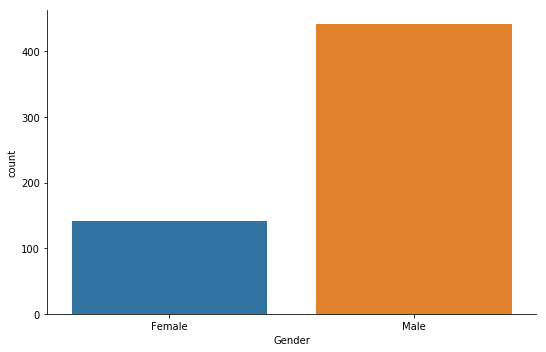

In [73]:
fg = sns.catplot('Gender', data=data, kind='count', aspect=1.5)
fg.set_xlabels('Gender')

In [74]:
data.groupby(['Gender', 'Dataset'])['Gender'].count()
## 1 = patient has liver disease
## 2 = patient does not have liver disease

Gender  Dataset
Female  1           92
        2           50
Male    1          324
        2          117
Name: Gender, dtype: int64

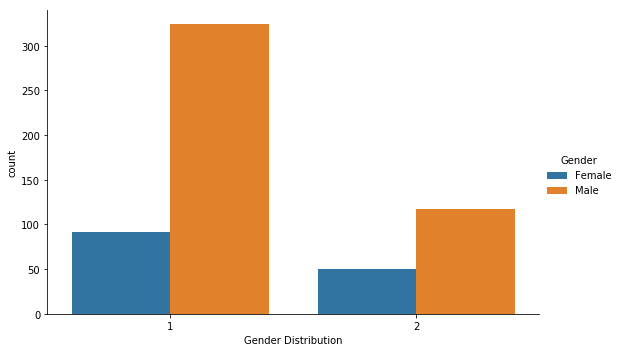

In [75]:
fg = sns.catplot('Dataset', data=data, hue='Gender',kind='count', aspect=1.5)
fg.set_xlabels('Gender Distribution')

In [76]:
data.groupby('Age')['Age'].count()


Age
4      2
6      1
7      2
8      1
10     1
11     1
12     2
13     4
14     2
15     1
16     3
17     5
18    11
19     2
20     3
21     7
22     9
23     3
24     5
25     5
26    14
27     6
28     8
29     7
30    10
31     8
32    20
33    15
34     8
35    12
      ..
48    20
49    11
50    23
51    10
52     7
53     6
54     8
55    18
56     4
57     7
58    14
60    34
61     5
62     9
63     2
64     6
65    17
66    12
67     1
68     4
69     2
70     9
72     8
73     2
74     4
75    14
78     1
84     1
85     1
90     1
Name: Age, Length: 72, dtype: int64

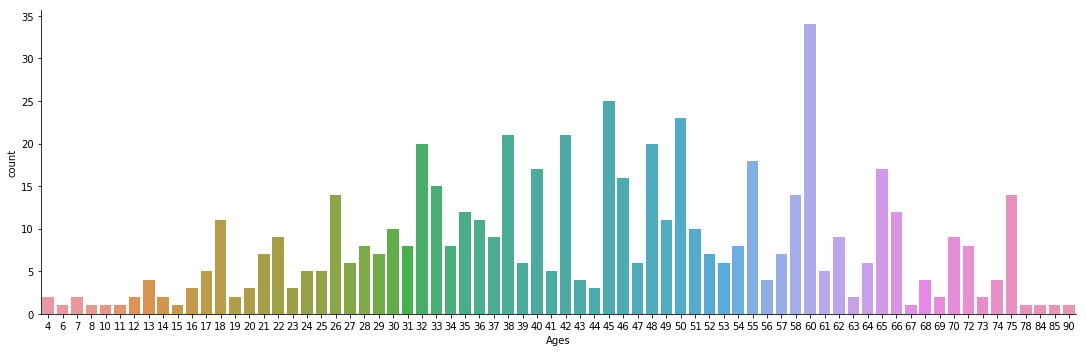

In [77]:
fg = sns.catplot('Age', data=data, kind='count', aspect=3.0)
fg.set_xlabels('Ages')

In [78]:
table = pd.crosstab(index=[data.Dataset], columns=[data.Gender,data.Age])


table.unstack()

Gender  Age  Dataset
Female  7    1           1
             2           0
        8    1           1
             2           0
        10   1           1
             2           0
        13   1           2
             2           0
        17   1           0
             2           2
        18   1           0
             2           1
        19   1           1
             2           0
        20   1           1
             2           1
        21   1           1
             2           0
        22   1           2
             2           1
        23   1           0
             2           1
        24   1           0
             2           2
        25   1           0
             2           2
        26   1           3
             2           0
        28   1           2
             2           2
                        ..
Male    62   1           6
             2           3
        63   1           1
             2           1
        64   1           3
       

Text(0.5, 1.0, 'Distribution of Ages')

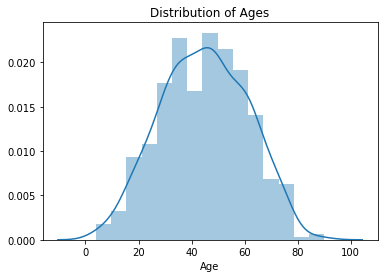

In [79]:
age = data['Age']
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Ages")


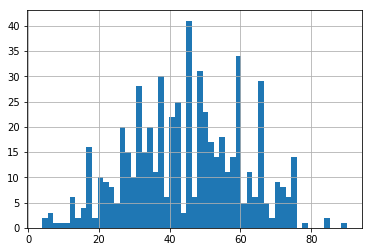

In [80]:
data['Age'].hist(bins=55)

In [81]:
def male_female_child(patient):
    age, gender = patient
    
    if age < 18:
        return 'child'
    else:
        return gender


data['Person'] = data[['Age', 'Gender']].apply(male_female_child, axis=1)


# Lets have a look at the first 10 rows of the data frame
data[:50]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Person
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,Female
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,Male
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,Male
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,Male
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,Male
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1,Male
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1,Female
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1,Female
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2,child
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1,Male


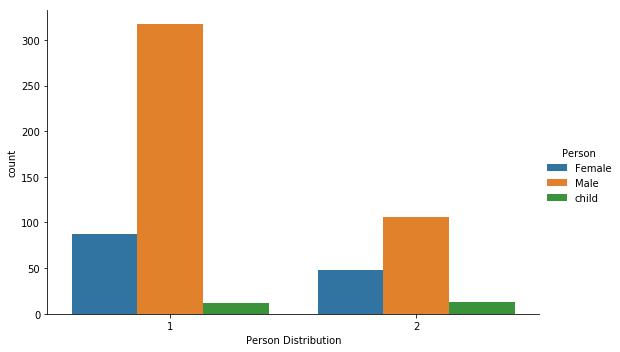

In [82]:
fg = sns.catplot('Dataset', data=data, hue='Person',kind='count', aspect=1.5)
fg.set_xlabels('Person Distribution')

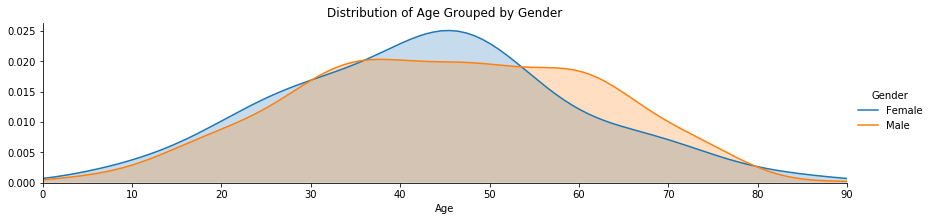

In [83]:
fig = sns.FacetGrid(data, hue='Gender', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

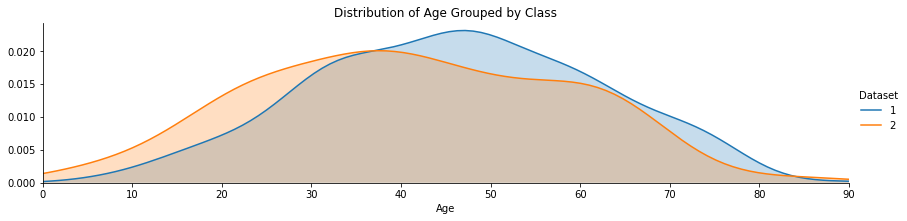

In [84]:
fig = sns.FacetGrid(data, hue='Dataset', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Class')
fig.add_legend()

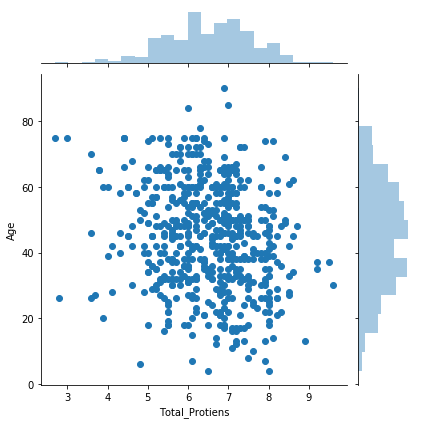

In [87]:
sns.jointplot(y='Age',x='Total_Protiens',data=data)

## Modelling Phase

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score 


In [93]:
gender_dummy = ['Gender']

In [94]:
final_data = pd.get_dummies(data,columns=gender_dummy,drop_first=True)

In [95]:
final_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Person,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,Female,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,Male,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,Male,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,Male,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,Male,1


In [99]:
final_data = final_data.drop(['Person'],axis=1)

In [101]:
final_data.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Male'],
      dtype='object')

In [102]:
X = final_data.drop('Dataset',axis=1)
y = final_data['Dataset']  ## target variable

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Training Decision Tree Model

In [104]:
dtree= DecisionTreeClassifier()

In [107]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
predictions = dtree.predict(X_test)

In [111]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.80      0.81      0.80       126
           2       0.49      0.47      0.48        49

   micro avg       0.71      0.71      0.71       175
   macro avg       0.64      0.64      0.64       175
weighted avg       0.71      0.71      0.71       175



### Training Random Forest Model

In [114]:
rf = RandomForestClassifier()

In [116]:
rf.fit(X_train,y_train)

C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [117]:
predictions = rf.predict(X_test)

In [119]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.73      0.88      0.80       126
           2       0.35      0.16      0.22        49

   micro avg       0.68      0.68      0.68       175
   macro avg       0.54      0.52      0.51       175
weighted avg       0.62      0.68      0.64       175



#### Decision Tree overall performed better than the Random Forest Model. Overall accuracy is not astounding. Lets check out the individual accuracy scores for the training and testing data.

In [128]:
print(accuracy_score(y_train, dtree.predict(X_train)))
print(accuracy_score(y_test, predictions))


1.0
0.68


In [129]:
print(accuracy_score(y_train, rf.predict(X_train)))
print(accuracy_score(y_test, predictions))


0.9681372549019608
0.68


#### Alright, as can be seen above, we see that out training data is fitting quite well and our test data is underfitting. Underfitting meaning the model has not learned enough from the training data that we provided. Now to solve this problem we can use a technique called 'K-Fold Cross Validation'. It allows you to train and test your model k-times on different subsets of training data and build up an estimate of the performance of a machine learning model on unseen data. Another folder will be set up in this repository specifically for Model Evaluation. Should be good fun.

#### Overfitting: Good performance on the training data, poor generliazation to other data.
#### Underfitting: Poor performance on the training data and poor generalization to other data